# **<span style="color: #FF5733;">Data Visualization</span>**
<span style="color: #FF5733;">Daniel Camacho</span><br>
<span style="color: #FF5733;">dacamachoh1@gmail.com</span><br><br><br>

Unos ejercicios de visualización de datos siguiendo los consejos en el libro: 
-   *Fundamentals of Data Visualization: A Primer on Making Informative and Compelling Figures* 

<img src="data_viz_book.png" alt="Descripción de la imagen" style="width: 400px;">


In [1]:
# Requerimientos: 
import os
import json
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# import tensorflow as tf
# import keras
# import sklearn
import os
import re 
import warnings
import plotly.io as pio

# Especifica la ruta a tu archivo kaggle.json
kaggle_json_path = './kaggle.json'

# Carga las credenciales desde el archivo kaggle.json
with open(kaggle_json_path, 'r') as file:
    kaggle_credentials = json.load(file)

os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']
from kaggle.api.kaggle_api_extended import KaggleApi


# Ignorar todos los warnings
warnings.filterwarnings('ignore')


Obtener data de Kagle con credenciales de la API:

In [2]:
# Autentica con Kaggle
api = KaggleApi()
api.authenticate()

# Descarga el dataset
dataset_path = 'girumwondemagegn/dataset-for-renewable-energy-systems'
api.dataset_download_files(dataset_path, path='./data', unzip=True)

message = 'Datos descargados con éxito por medio de la API de Kaggle'
print(message)

Dataset URL: https://www.kaggle.com/datasets/girumwondemagegn/dataset-for-renewable-energy-systems
Datos descargados con éxito por medio de la API de Kaggle


Leer data:

In [3]:
df = pd.read_csv('data/energy_dataset_.csv')
print('Dimensiones del dataframe:', df.shape)

Dimensiones del dataframe: (15000, 13)


Se va a tomar cierto material de esta [notebook](https://www.kaggle.com/code/edmund24/eda-of-renewable-energy-systems) para hacer comentarios. 


Por ejemplo, esta gráfica tiene un error: 

In [4]:
df.head(10)

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
0,4,93.423205,103853.2206,248708.4892,2953.248771,89.887562,4,4.732248e+08,1,9.207772e+06,6663.816572,81.742461,1366
1,4,590.468942,190223.0649,166104.1642,5305.174042,84.403343,4,1.670697e+08,2,1.685101e+06,30656.049820,78.139042,1743
2,1,625.951142,266023.4824,424114.6308,2620.192622,60.498249,2,8.463610e+07,2,5.111813e+06,1749.613759,8.461296,363
3,1,779.998728,487039.5296,308337.7316,1925.250307,86.897861,3,3.967690e+08,2,4.805902e+06,43233.237820,8.402441,2821
4,3,242.106837,482815.0856,360437.7705,3948.945383,70.949351,2,3.574413e+07,1,1.668601e+07,14858.662760,28.822867,2583
5,1,596.174631,292384.4630,415449.6225,9767.234396,50.901906,3,4.491505e+08,2,1.131538e+07,16089.626080,9.038487,309
6,5,912.460626,166865.9068,268570.0281,9177.042493,54.345463,1,4.859538e+08,1,8.453916e+06,9140.340246,20.112187,3483
7,1,782.934466,277874.8920,228390.8408,8894.275957,72.323955,2,2.370064e+08,1,6.831258e+06,7054.752767,45.168505,4155
8,1,842.247822,456305.5836,364032.5316,1463.242396,73.447907,2,1.077780e+08,1,1.552282e+07,40329.047780,83.563567,4617
9,2,778.669295,401363.1727,216170.7123,1792.133939,90.592402,3,4.725459e+08,2,1.408617e+07,20564.874540,66.213957,727



>>> Wrong:


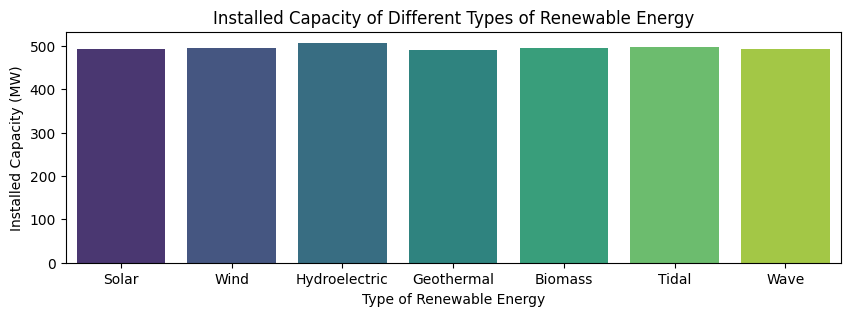

In [14]:
plt.figure(figsize=(10, 3))
sns.barplot(x='Type_of_Renewable_Energy', y='Installed_Capacity_MW', data=df, ci=None, palette='viridis')
plt.title('Installed Capacity of Different Types of Renewable Energy')
plt.xlabel('Type of Renewable Energy')
plt.ylabel('Installed Capacity (MW)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Solar', 'Wind', 'Hydroelectric', 'Geothermal', 'Biomass', 'Tidal', 'Wave'])
print('\n>>> Wrong:')
plt.show()

Errores de esa gráfica: 
-   No se sabe cuál tiene más MW
-   ni cuánta es la diferencia
-   Ni se sabe si es la media, mediana o que en el eje y

Corrección, usando plotly:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type_of_Renewable_Energy       15000 non-null  int64  
 1   Installed_Capacity_MW          15000 non-null  float64
 2   Energy_Production_MWh          15000 non-null  float64
 3   Energy_Consumption_MWh         15000 non-null  float64
 4   Energy_Storage_Capacity_MWh    15000 non-null  float64
 5   Storage_Efficiency_Percentage  15000 non-null  float64
 6   Grid_Integration_Level         15000 non-null  int64  
 7   Initial_Investment_USD         15000 non-null  float64
 8   Funding_Sources                15000 non-null  int64  
 9   Financial_Incentives_USD       15000 non-null  float64
 10  GHG_Emission_Reduction_tCO2e   15000 non-null  float64
 11  Air_Pollution_Reduction_Index  15000 non-null  float64
 12  Jobs_Created                   15000 non-null 


>>> Good:


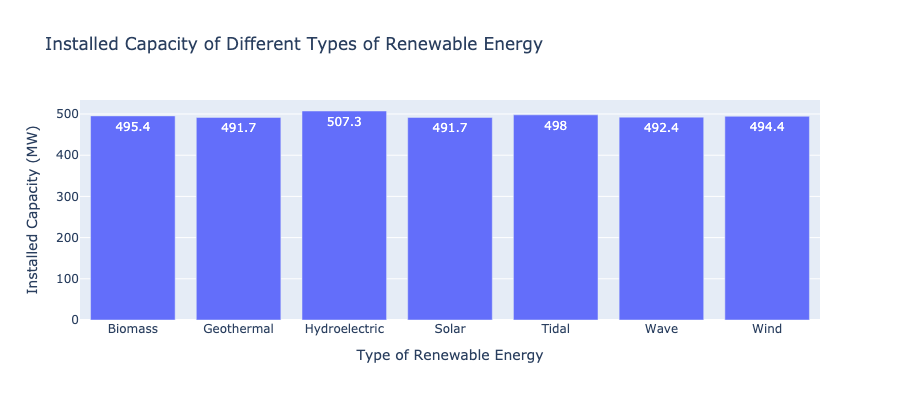

In [15]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
from IPython.display import Image

# Crear variable de eje
energy_map = {
    1: 'Solar',
    2: 'Wind',
    3: 'Hydroelectric',
    4: 'Geothermal',
    5: 'Biomass',
    6: 'Tidal',
    7: 'Wave'
}

# Crear la columna 'Type_of_Renewable_Energy_label'
df['Type_of_Renewable_Energy_label'] = df['Type_of_Renewable_Energy'].map(energy_map)

# Agrupar a la media
tab = df.groupby('Type_of_Renewable_Energy_label').agg(
    Installed_Capacity_MW = ('Installed_Capacity_MW', 'mean')).reset_index()

# Redondear para verla más limpia
tab['Installed_Capacity_MW'] = tab['Installed_Capacity_MW'].round(1)

fig = px.bar(tab, 
             x='Type_of_Renewable_Energy_label', 
             y='Installed_Capacity_MW',
             title='Installed Capacity of Different Types of Renewable Energy',
             labels={'Type_of_Renewable_Energy_label': 'Type of Renewable Energy', 
                     'Installed_Capacity_MW': 'Installed Capacity (MW)'},
             text='Installed_Capacity_MW')

# Guardar la imagen como PNG
pio.write_image(fig, 'plots/plot1.png', width=900, height=400)

# Mostrar la imagen guardada
print('\n>>> Good:')
Image('plots/plot1.png')